In [ ]:
import pandas as pd

df = pd.read_csv("global_climate_energy_2020_2024.csv")
print("91000:", df.shape[0])
print("10:", df.shape[1])
df.head()



91000: 36540
10: 10


,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
count,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000,36540.000000
mean,13.580868,59.971469,445.820452,7295.904857,15.944080,74.982156,70.173094,115.279848
std,10.077249,17.303103,234.360906,3693.928504,5.334804,8.645400,17.334816,49.178361
min,-9.600000,30.000000,50.150000,1001.890000,5.000000,60.000000,40.000000,30.000000
25%,5.630000,45.010000,248.675000,4184.177500,12.020000,67.470000,55.300000,72.420000
50%,13.790000,59.990000,422.655000,6921.620000,15.715000,75.030000,70.055000,115.240000
75%,20.840000,74.970000,628.422500,10175.110000,19.840000,82.502500,85.260000,158.270000
max,38.710000,90.000000,999.850000,15998.050000,30.870000,90.000000,100.000000,200.000000


In [ ]:

df['date'] = pd.to_datetime(df['date'])

df = df.sort_values('date')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df[['date', 'year', 'month', 'day']].head()


,date,year,month,day
0,2020-01-01,2020,1,1
25578,2020-01-01,2020,1,1
29232,2020-01-01,2020,1,1
3654,2020-01-01,2020,1,1
23751,2020-01-01,2020,1,1


In [ ]:
monthly_consumption = df.groupby('month')['energy_consumption'].mean()

monthly_consumption


,energy_consumption
month,
1,6669.119455
2,8431.786669
3,9065.672152
4,8351.482300
5,6746.685452
6,4466.841937
7,6719.883842
8,8427.114981
9,9137.844147


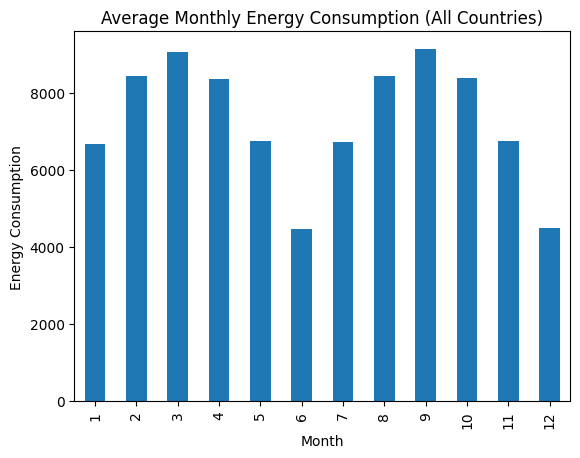

In [ ]:
import matplotlib.pyplot as plt

monthly_consumption.plot(kind='bar', title='Average Monthly Energy Consumption (All Countries)')
plt.ylabel("Energy Consumption")
plt.xlabel("Month")
plt.show()


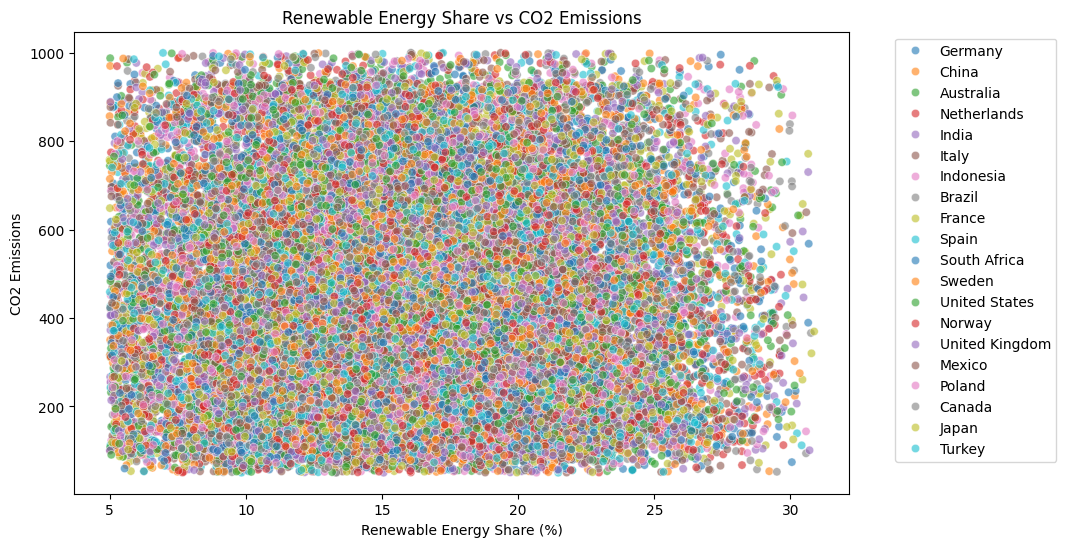

,renewable_share,co2_emission
renewable_share,1.000000,-0.001837
co2_emission,-0.001837,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='renewable_share',
    y='co2_emission',
    hue='country',
    alpha=0.6,
    palette='tab10',
    data=df
)
plt.title("Renewable Energy Share vs CO2 Emissions")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("CO2 Emissions")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
df[['renewable_share','co2_emission']].corr()


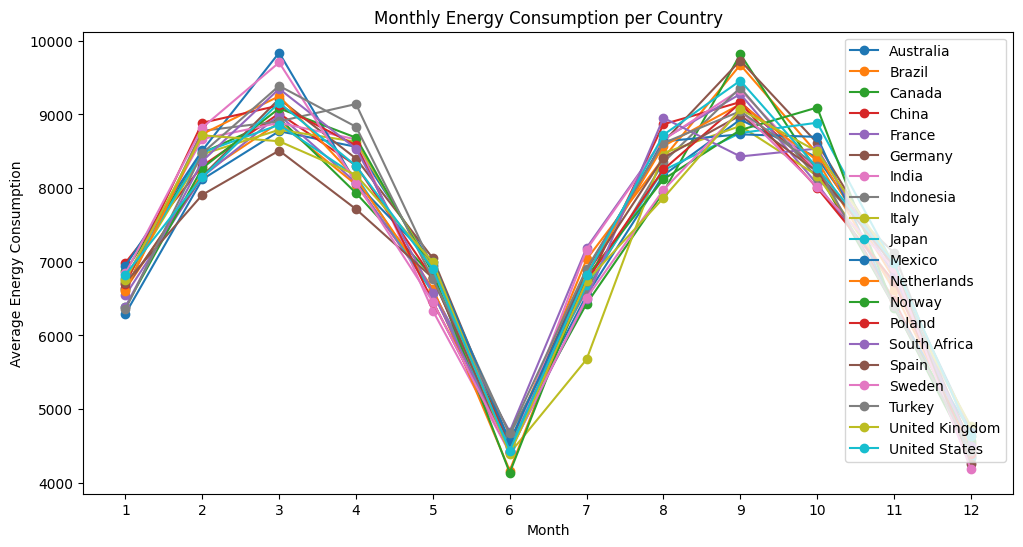

In [ ]:
import matplotlib.pyplot as plt


monthly_country = df.groupby(['country','month'])['energy_consumption'].mean().reset_index()
plt.figure(figsize=(12,6))
for country in monthly_country['country'].unique():
    data = monthly_country[monthly_country['country']==country]
    plt.plot(data['month'], data['energy_consumption'], marker='o', label=country)

plt.title("Monthly Energy Consumption per Country")
plt.xlabel("Month")
plt.ylabel("Average Energy Consumption")
plt.xticks(range(1,13))
plt.legend()
plt.show()


In [ ]:

consumption_stats = df.groupby('country')['energy_consumption'].agg(['max','min','mean']).reset_index()
consumption_stats.rename(columns={'max':'Max Consumption', 'min':'Min Consumption', 'mean':'Mean Consumption'}, inplace=True)


peak_month = df.groupby(['country','month'])['energy_consumption'].mean().reset_index()
peak_month = peak_month.loc[peak_month.groupby('country')['energy_consumption'].idxmax()]
peak_month = peak_month[['country','month','energy_consumption']].rename(columns={'month':'Peak Month','energy_consumption':'Peak Consumption'})


kpi = consumption_stats.merge(peak_month, on='country')
kpi


,country,Max Consumption,Min Consumption,Mean Consumption,Peak Month,Peak Consumption
0,Australia,15977.47,1001.89,7239.898002,9,8930.302600
1,Brazil,15962.33,1111.12,7308.893284,9,9673.537400
2,Canada,15985.54,1023.30,7220.403492,9,9818.157000
3,China,15984.96,1005.41,7307.754510,9,9168.557933
4,France,15978.15,1001.93,7301.720279,9,9278.033067
5,Germany,15998.05,1105.66,7435.521138,9,9731.805400
6,India,15982.69,1007.70,7352.730717,9,9336.787400
7,Indonesia,15953.50,1092.97,7401.155473,9,9364.254333
8,Italy,15997.17,1047.82,7204.331883,9,8843.837133
9,Japan,15885.11,1008.38,7260.910684,10,8887.977806


In [ ]:
import pandas as pd

consumption_stats = df.groupby('country')['energy_consumption'].agg(
    Max_Consumption='max',
    Min_Consumption='min',
    Mean_Consumption='mean'
).reset_index()

peak_month = df.groupby(['country','month'])['energy_consumption'].mean().reset_index()
peak_month = peak_month.loc[peak_month.groupby('country')['energy_consumption'].idxmax()]
peak_month = peak_month[['country','month','energy_consumption']].rename(
    columns={'month':'Peak_Month','energy_consumption':'Peak_Consumption'}
)

kpi_df = consumption_stats.merge(peak_month, on='country')

kpi_df


,country,Max_Consumption,Min_Consumption,Mean_Consumption,Peak_Month,Peak_Consumption
0,Australia,15977.47,1001.89,7239.898002,9,8930.302600
1,Brazil,15962.33,1111.12,7308.893284,9,9673.537400
2,Canada,15985.54,1023.30,7220.403492,9,9818.157000
3,China,15984.96,1005.41,7307.754510,9,9168.557933
4,France,15978.15,1001.93,7301.720279,9,9278.033067
5,Germany,15998.05,1105.66,7435.521138,9,9731.805400
6,India,15982.69,1007.70,7352.730717,9,9336.787400
7,Indonesia,15953.50,1092.97,7401.155473,9,9364.254333
8,Italy,15997.17,1047.82,7204.331883,9,8843.837133
9,Japan,15885.11,1008.38,7260.910684,10,8887.977806


In [ ]:
temp_month = df.groupby(['country','month'])['avg_temperature'].mean().reset_index()

peak_temp = kpi_df.merge(temp_month, left_on=['country','Peak_Month'], right_on=['country','month'])
peak_temp = peak_temp[['country','Peak_Month','Peak_Consumption','avg_temperature']]
peak_temp.rename(columns={'avg_temperature':'Temperature_at_Peak'}, inplace=True)

peak_temp


,country,Peak_Month,Peak_Consumption,Temperature_at_Peak
0,Australia,9,8930.302600,11.929733
1,Brazil,9,9673.537400,-0.909667
2,Canada,9,9818.157000,4.948800
3,China,9,9168.557933,4.245067
4,France,9,9278.033067,-0.859733
5,Germany,9,9731.805400,11.115533
6,India,9,9336.787400,-6.164667
7,Indonesia,9,9364.254333,-0.664067
8,Italy,9,8843.837133,9.303067
9,Japan,10,8887.977806,13.773226


In [ ]:
renewable_avg = df.groupby('country')['renewable_share'].mean().reset_index()
renewable_avg.rename(columns={'renewable_share':'Avg_Renewable_Share'}, inplace=True)

kpi_analysis = kpi_df.merge(renewable_avg, on='country')

correlation = kpi_analysis[['Mean_Consumption','Avg_Renewable_Share']].corr()
correlation


,Mean_Consumption,Avg_Renewable_Share
Mean_Consumption,1.000000,0.213073
Avg_Renewable_Share,0.213073,1.000000


In [ ]:
report = []

for idx, row in kpi_analysis.iterrows():
    country = row['country']
    mean_cons = row['Mean_Consumption']
    peak_month = row['Peak_Month']
    peak_cons = row['Peak_Consumption']
    renewable = row['Avg_Renewable_Share']
    temp_peak = peak_temp[peak_temp['country'] == country]['Temperature_at_Peak'].values[0]

    insight = f"{country}: Peak consumption is {peak_cons:.2f} in month {peak_month} at temperature {temp_peak:.1f}°C. " \
              f"Mean consumption is {mean_cons:.2f} with an average renewable energy share of {renewable:.1f}%. "

    if temp_peak < 10:
        insight += "Peak demand likely driven by heating needs."
    elif temp_peak > 25:
        insight += "Peak demand likely driven by cooling needs."
    else:
        insight += "Peak demand occurs in moderate temperature conditions."

    report.append(insight)

for r in report:
    print(r)


Australia: Peak consumption is 8930.30 in month 9 at temperature 11.9°C. Mean consumption is 7239.90 with an average renewable energy share of 16.0%. Peak demand occurs in moderate temperature conditions.
Brazil: Peak consumption is 9673.54 in month 9 at temperature -0.9°C. Mean consumption is 7308.89 with an average renewable energy share of 16.0%. Peak demand likely driven by heating needs.
Canada: Peak consumption is 9818.16 in month 9 at temperature 4.9°C. Mean consumption is 7220.40 with an average renewable energy share of 16.0%. Peak demand likely driven by heating needs.
China: Peak consumption is 9168.56 in month 9 at temperature 4.2°C. Mean consumption is 7307.75 with an average renewable energy share of 15.9%. Peak demand likely driven by heating needs.
France: Peak consumption is 9278.03 in month 9 at temperature -0.9°C. Mean consumption is 7301.72 with an average renewable energy share of 16.0%. Peak demand likely driven by heating needs.
Germany: Peak consumption is 9731.

In [ ]:
summary_report = []

for idx, row in kpi_analysis.iterrows():
    country = row['country']
    peak_month = row['Peak_Month']
    peak_cons = row['Peak_Consumption']
    temp_peak = peak_temp[peak_temp['country'] == country]['Temperature_at_Peak'].values[0]
    mean_cons = row['Mean_Consumption']
    renewable = row['Avg_Renewable_Share']

    if temp_peak < 10:
        driver = "heating needs"
    elif temp_peak > 25:
        driver = "cooling needs"
    else:
        driver = "moderate temperature"

    summary = f"{country}: Peak={peak_cons:.0f} in month {peak_month} (Temp={temp_peak:.1f}°C), Mean={mean_cons:.0f}, Renewable={renewable:.1f}%, Driven by {driver}."
    summary_report.append(summary)

for s in summary_report:
    print(s)


Australia: Peak=8930 in month 9 (Temp=11.9°C), Mean=7240, Renewable=16.0%, Driven by moderate temperature.
Brazil: Peak=9674 in month 9 (Temp=-0.9°C), Mean=7309, Renewable=16.0%, Driven by heating needs.
Canada: Peak=9818 in month 9 (Temp=4.9°C), Mean=7220, Renewable=16.0%, Driven by heating needs.
China: Peak=9169 in month 9 (Temp=4.2°C), Mean=7308, Renewable=15.9%, Driven by heating needs.
France: Peak=9278 in month 9 (Temp=-0.9°C), Mean=7302, Renewable=16.0%, Driven by heating needs.
Germany: Peak=9732 in month 9 (Temp=11.1°C), Mean=7436, Renewable=16.0%, Driven by moderate temperature.
India: Peak=9337 in month 9 (Temp=-6.2°C), Mean=7353, Renewable=16.0%, Driven by heating needs.
Indonesia: Peak=9364 in month 9 (Temp=-0.7°C), Mean=7401, Renewable=15.9%, Driven by heating needs.
Italy: Peak=8844 in month 9 (Temp=9.3°C), Mean=7204, Renewable=15.9%, Driven by heating needs.
Japan: Peak=8888 in month 10 (Temp=13.8°C), Mean=7261, Renewable=15.9%, Driven by moderate temperature.
Mexico: 